<h1><center>Data Science with Python -  Course 1<center></h1>
# <center> Statistical and Data Techniques in Data Science <center>

# <center>======================================<cent>

### Statistical analysis is at the core of data science. Using statistics, you can learn about the <font color=red> distribution of the data</font>, how much of <font color=red> variance there is between values</font>, and how values for <font color=red>  one feature of the data to influence other values</font> and so on. 

# <center>======================================<cent>

# <center> 0. Statistics<center>

## Science of data collection, summarization, analysis and interpretation

## Descriptive versus Inferential Statistics: 
  - Descriptive Statistics: Data description (summarization) such as center, variability and shape.
  - Inferential Statistics: Drawing conclusion beyond the sample studied, allowing for prediction.

# <center>======================================<cent>

# <center>1. Descriptive Statistics of Data<center>

## Statistics describes a numeric set of data by its
* Center (mean, median, mode etc)
* Variability (standard deviation, range etc)
* Shape (skewness, kurtosis etc)

## Statistics describes a categorical set of data by 
* Frequency, percentage or proportion of each category

# <center>======================================<cent>

# 1.1 Data sample 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Load data sample 
data = pd.read_csv("Iris_Data.csv")
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [2]:
# Number of rows
print(data.shape)

(150, 5)


In [3]:
# Column names
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [4]:
# Data types
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [5]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [6]:
# One way to count each species
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [7]:
len(data['sepal_length'])

150

In [8]:
# Display a description of the dataset
display(data.describe())

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [9]:
data.describe().loc['mean']

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
Name: mean, dtype: float64

In [10]:
data.describe().loc['max']

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
Name: max, dtype: float64

# <center>======================================<cent>

<h1> 1.2 Central Tendencies</h1>
<h3>Notation of where our data is centered</h3>
# *Means*
## Most commonly we’ll use the mean (or average), which is just the sum of the data divided by its count.

### Population Mean Formula

$$\mu=\frac{1}{N}\sum_{j=1}^Nx_j$$

### Sample Mean Formula

$$\bar x=\frac{1}{n}\sum_{j=1}^nx_j$$

In [11]:
# this isn't right if you don't from __future__ import division
def Mean(x):
    return sum(x)/len(x)

# E.g. 1, 
x=[12, 13, 14, 15, 20 ,70, 60, 11]
print(Mean(x))
# E.g. 2,
print(Mean(data['sepal_length']))

26.875
5.843333333333335


## Function *mean* in libraries

In [12]:
# Function 'mean' in library 'statistics'
import statistics as sta
sta.mean(data['sepal_length'])

5.843333333333334

In [13]:
import numpy as np
np.mean(data['sepal_length'])

5.843333333333335

# *Median*

# *Median* is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).


# Example: 
 - For example, consider the list of numbers

   $$ 1,~ 3,~ 3,~ 6, ~7, ~8, ~9$$

This list contains seven numbers. The median is the fourth of them, which is 6.
 
 - If there is an even number of observations, then there is no single middle value; the median is then usually defined to be the mean of the two middle values. For example, in the data set

    1, 2, 3, 4, 5, 6, 8, 9

the median is the mean of the middle two numbers: this is (4 + 5)/2=4.5, which is 4.5

In [14]:
# this isn't right if you don't from __future__ import division

def Median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n % 2 == 1:
# if odd, return the middle value
        return sorted_v[midpoint]
    else:
# if even, return the average of the middle values
        lo = midpoint - 1 
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
    
#========
    
#Example 1
x=[1, 3, 3, 6, 7, 8, 9]
print(Median(x))
y=[1, 2, 3, 4, 5, 6, 8, 9]
print(Median(y))

#Example 2
print(Median(data['sepal_length']))

6
4.5
5.8


## Function *median* in  libraries 

In [15]:
# Funciton 'median' in statistics library 
print(sta.median(data['sepal_length']))

5.8


In [16]:
# Funciton 'median' in statistics library 
print(np.median(data['sepal_length']))

5.8


# *Mode 

### The mode is the most commonly occurring value
### Exampe: mode([1,2,1,3,4,5,5])=[1]

## Function *mode* in 'statistics' lib

In [17]:
print(sta.mode([1,2,1,3,4,5,6]))

1


In [18]:
print(data['sepal_length'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


In [19]:
print(sta.mode([1,2,1,2,4,5,4,4]))
print(sta.mode(data['sepal_length']))

4
5.0


In [20]:
print(sta.mode([1,1,1,2,2,2,3,4,5]))

StatisticsError: no unique mode; found 2 equally common values

## Another examples

In [21]:
# pizza price in New York & Los Angeless
df_pizza_price = pd.read_csv("Pizza_Price_Data.csv")
df_pizza_price

New York  Los Angeles
0        1.0          1.0
1        2.0          2.0
2        3.0          3.0
3        3.0          4.0
4        5.0          5.0
5        6.0          6.0
6        7.0          7.0
7        8.0          8.0
8        9.0          9.0
9       11.0         11.0
10      66.0          NaN

In [22]:
print('Mean pizza price in New York: ')
print(sta.mean(df_pizza_price['New York']))
print('Mean pizza price in Los Angeless: ')
print(sta.mean(df_pizza_price['Los Angeles'].dropna()))

Mean pizza price in New York: 
11.0
Mean pizza price in Los Angeless: 
5.6


### How we can conclude about the pizza price between NY & LA?

#### *On average, pizza in New York is twice as expensive as in LA, right?

In [23]:
print('Median pizza price in New York: ')
print(sta.median(df_pizza_price['New York']))
print('Median pizza price in Los Angeless: ')
print(sta.median(df_pizza_price['Los Angeles'].dropna()))

Median pizza price in New York: 
6.0
Median pizza price in Los Angeless: 
5.5


#### Okay, we have seen that the median is not affected by extreme prices, which is good when we have posh New York restaurants in a street pizza sample. But we still don’t get the full picture. Are the majority of restaurants low cost or average?

In [24]:
print('Mode pizza price in New York: ')
print(sta.mode(df_pizza_price['New York']))
print('Mode pizza price in Los Angeless: ')
print(sta.mode(df_pizza_price['Los Angeles'].dropna()))

Mode pizza price in New York: 
3.0
Mode pizza price in Los Angeless: 


StatisticsError: no unique mode; found 10 equally common values

#### Well, we say that there is no mode for LA pizza prices since each price appears only once. 

# <center>======================================<cent>

# Quantiles

### In statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals.

### Example 
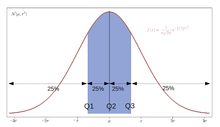

In [25]:
def Quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("Q1 =", Quantile(data['sepal_length'], 0.25))
print("Q2 =", Quantile(data['sepal_length'], 0.5))
print("Q3 =", Quantile(data['sepal_length'], 0.75))

Q1 = 5.1
Q2 = 5.8
Q3 = 6.4


In [26]:
x=[3, 6, 7, 8, 8, 10, 13, 15, 16]
print("Q1 =", Quantile(x, 0.25))
print("Q2 =", Quantile(x, 0.5))
print("Q3 =", Quantile(x, 0.75))

Q1 = 7
Q2 = 8
Q3 = 13


# Percentile

In [27]:
print(np.percentile(data['sepal_length'], 25))
print(np.percentile(data['sepal_length'], 50))
print(np.percentile(data['sepal_length'], 75))

5.1
5.8
6.4


# Quartiles 
### Zeroth quartile = min 
### First quartile = percentile(X, 25) = Q1
### Second quartile = median = Q2
### Third quartile = percentile(X,75) = Q3
### Fourth quartile = max
### The inter-quartile range (IQR) is the difference between the first and third quartiles, i.e. IQR = Q3- Q1 

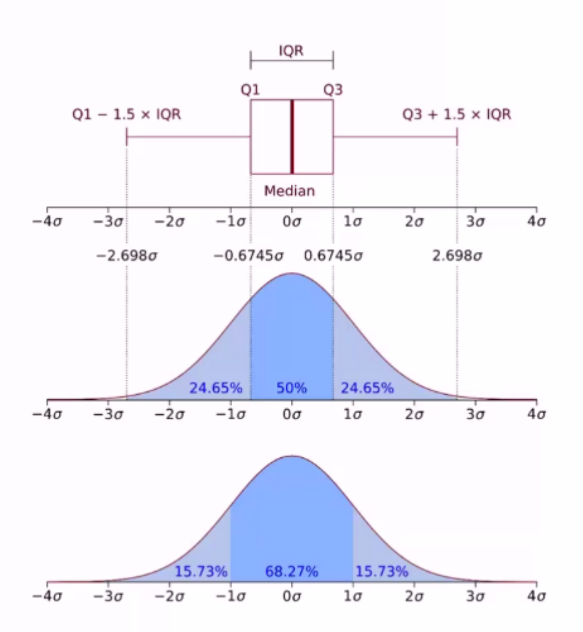

In [28]:
from IPython.display import Image
%matplotlib inline
Image(filename='quartiles.png', width=600) 

# <center>======================================<center>

<h1>1.3 Dispersion</h1>
<h3>Dispersion refers to measures of how spread out our data is<h3>

# *Range = max-min*  
### (or  sometimes Range =[min, max])

In [29]:
# Range=max-min,"range" already means something in Python, so we'll use a different name
def Range(x):
    return max(x)-min(x)

Range(data['sepal_length'])

3.6000000000000005

# *Variance and Standard deviation (std)*

### The variance measures the dispresion of the data from the mean
### Population Variance Formula 
$$variance:\quad \sigma^2=\frac{1}{N}\sum_{j=1}^N(x_j-\mu)^2$$
### Sample Variance Formula 
$$variance: \quad s^2=\frac{1}{n-1}\sum_{j=1}^n(x_j-\bar x)^2$$
### Formula of standard deviation 
$$std=\sqrt{variance}$$

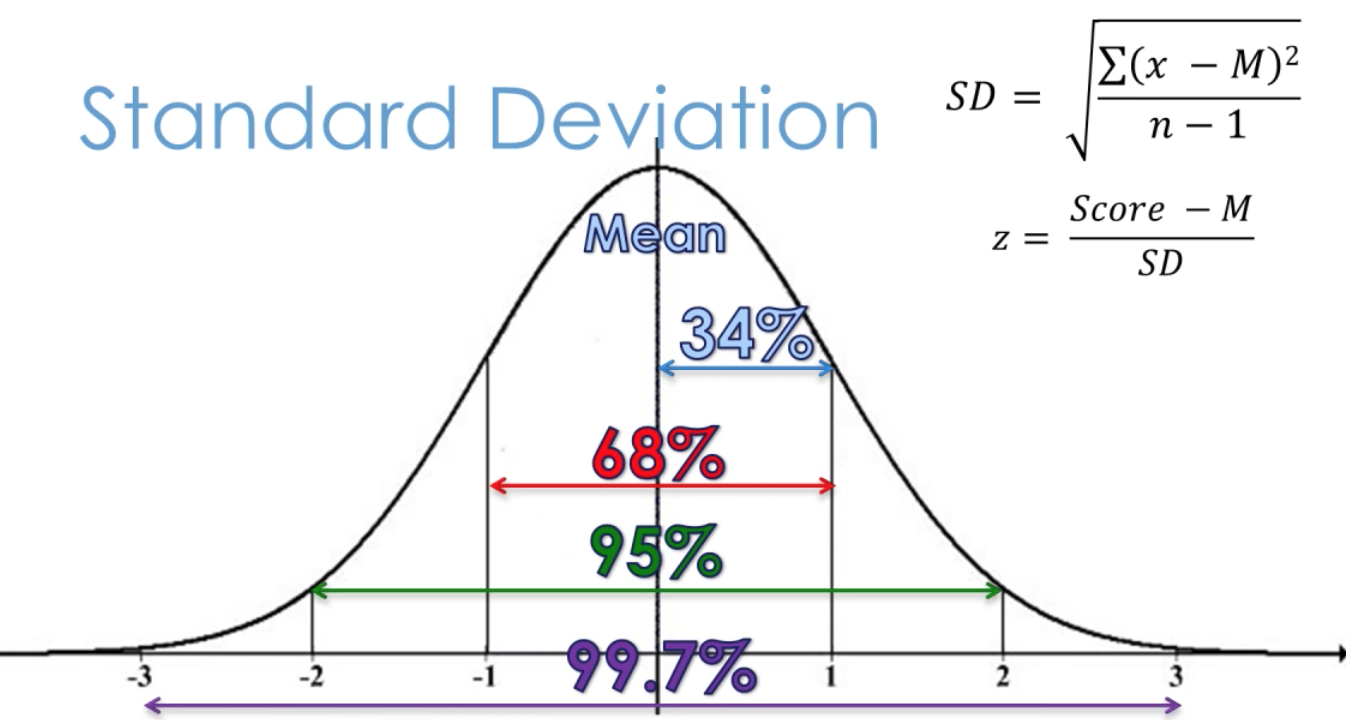

In [30]:
Image(filename='standard_deviation.png', width=600) 

In [31]:
def Variance(x):
    n = len(x)
    return sum((x_i-Mean(x))**2 for x_i in x) / (n - 1)

import math
def StD(x):
    return math.sqrt(Variance(x))

print(Variance(data['sepal_length']))
print(StD(data['sepal_length']))

0.6856935123042505
0.8280661279778629


## Functions *variance* and *stded* in 'statistics' library

In [32]:
print(sta.variance(data['sepal_length']))   # Sample variance
print(sta.stdev(data['sepal_length']) )     # Sample std
print(sta.pvariance(data['sepal_length']))  #Population variance
print(sta.pstdev(data['sepal_length']))     # Population std

0.6856935123042506
0.8280661279778629
0.6811222222222223
0.8253012917851409


# *Skewness* 

### How asymmetric data is spread around the mean. If it is positive, the distribution is right skewed; if negative, the distribution is left skewed. A normal ditribution has a skew of 0. It is the third moment.
### Population Skewness Formula : 
$$skewness=\frac{1}{N}\frac{\sum_{j=1}^N(x_j-\mu)^3}{\sigma^3}$$
### Sample Skewness Formula : 
$$skewness=\frac{n}{(n-1)(n-2)}\frac{\sum_{j=1}^n(x_j-\bar x)^3}{s^3}$$


In [33]:
import scipy.stats as ss 
ss.skew(data['sepal_length'])

0.3117530585022963

### Examples

In [34]:
# load data set
df_skewness = pd.read_csv("Skewness_Data.csv")
df_skewness

Set 1  Set 2  Set 3
0     1.0    1.0      1
1     1.0    1.0      2
2     1.0    2.0      3
3     1.0    2.0      3
4     2.0    3.0      4
5     2.0    3.0      4
6     2.0    3.0      4
7     2.0    4.0      5
8     2.0    4.0      5
9     2.0    4.0      5
10    3.0    4.0      5
11    3.0    4.0      6
12    3.0    5.0      6
13    3.0    5.0      6
14    4.0    5.0      6
15    4.0    6.0      6
16    5.0    6.0      6
17    5.0    7.0      7
18    7.0    7.0      7
19    NaN    NaN      7

In [35]:
print('Mean - Mode - Median: Set 1')
print(sta.mean(df_skewness['Set 1'].dropna()))
print(sta.mode(df_skewness['Set 1'].dropna()))
print(sta.median(df_skewness['Set 1'].dropna()))
print('Mean - Mode - Median: Set 2')
print(sta.mean(df_skewness['Set 2'].dropna()))
print(sta.mode(df_skewness['Set 2'].dropna()))
print(sta.median(df_skewness['Set 2'].dropna()))
print('Mean - Mode - Median: Set 3')
print(sta.mean(df_skewness['Set 3'].dropna()))
print(sta.mode(df_skewness['Set 3'].dropna()))
print(sta.median(df_skewness['Set 3'].dropna()))


Mean - Mode - Median: Set 1
2.789473684210526
2.0
2.0
Mean - Mode - Median: Set 2
4.0
4.0
4.0
Mean - Mode - Median: Set 3
4.9
6
5.0


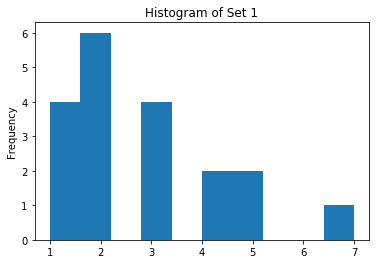

In [36]:
# Plot histogram
import matplotlib.pyplot as plt
df_skewness['Set 1'].dropna().plot(kind='hist')
plt.title('Histogram of Set 1') # add a title to the histogram
plt.show()

Text(0.5,1,'Histograms of Sets 1, 2 & 3')

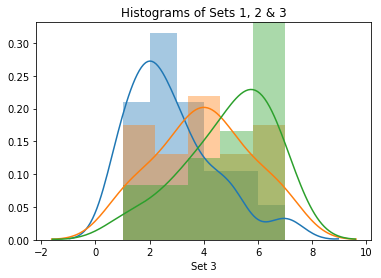

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(df_skewness['Set 1'].dropna())

# seaborn histogram
sns.distplot(df_skewness['Set 2'].dropna())

# seaborn histogram
sns.distplot(df_skewness['Set 3'].dropna())

# Add labels
plt.title('Histograms of Sets 1, 2 & 3')

### When we have right skewness, the mean is bigger than the median, and the mode is the value with the highest visual representation.

### We have plotted a data set that has an equal mean, median and mode. The frequency of occurrence is completely symmetrical and we call this a zero or no skew. Most often, you will hear people say that the distribution is symmetrical.

### We have a mean of 4.9, a median of 5 and a mode of 6. As the mean is lower than the median, we say that there is a negative or left skew. Once again, the highest point is defined by the mode. Why is it called a left skew, again? That’s right, because the outliers are to the left.

### Why is skewness important? Skewness tells us a lot about where the data is situated. As we mentioned in our previous lesson, the mean, median and mode should be used together to get a good understanding of the dataset. Measures of asymmetry like skewness are the link between central tendency measures and probability theory, which ultimately allows us to get a more complete understanding of the data we are working with.

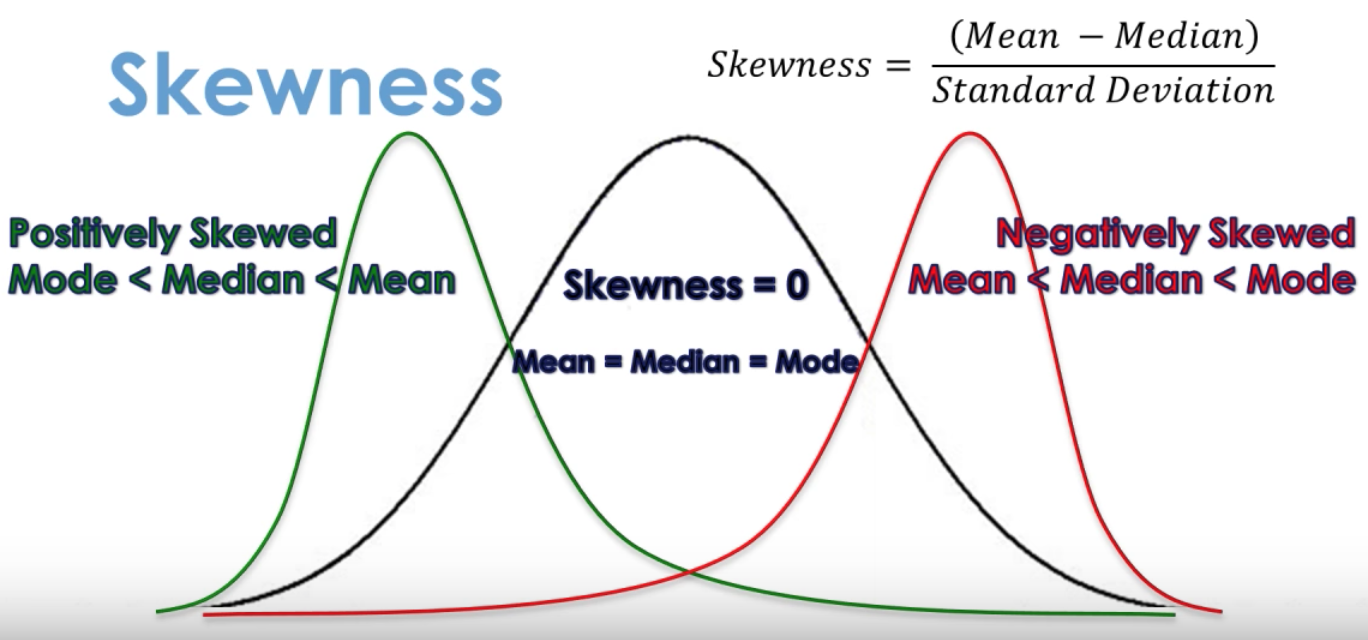

In [38]:
Image(filename='skewness.png', width=600) 

# *Kurtosis* 
### Kurtosis is a measure of peakedness.  The higher the kurtosis measure is, the more outliers are present and the longer the tails of the distribution in the histogram are.  It is the fourth moment.
### Polulation Kurtosis Formula: 
$$kurtosis=\frac{1}{N}\frac{\sum_{j=1}^N(x_j-\mu)^4}{\sigma^4}$$
### Sample Kurtosis Formula: 
$$kurtosis=\frac{n(n+1)}{(n-1)(n-2)(n-3)}\frac{\sum_{j=1}^n(x_j-\bar x)^4}{s^4}$$
### Note: excess kurtosis =(simple) kurtosis - 3

In [39]:
ss.kurtosis(data['sepal_length'])  # excess kurtosis = k - 3

-0.5735679489249765

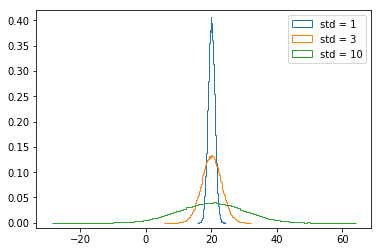

In [40]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [41]:
print(ss.kurtosis(samples_std1))
print(ss.kurtosis(samples_std3))
print(ss.kurtosis(samples_std10))

-0.01404165378262423
0.01563891768669512
0.002923304866689236


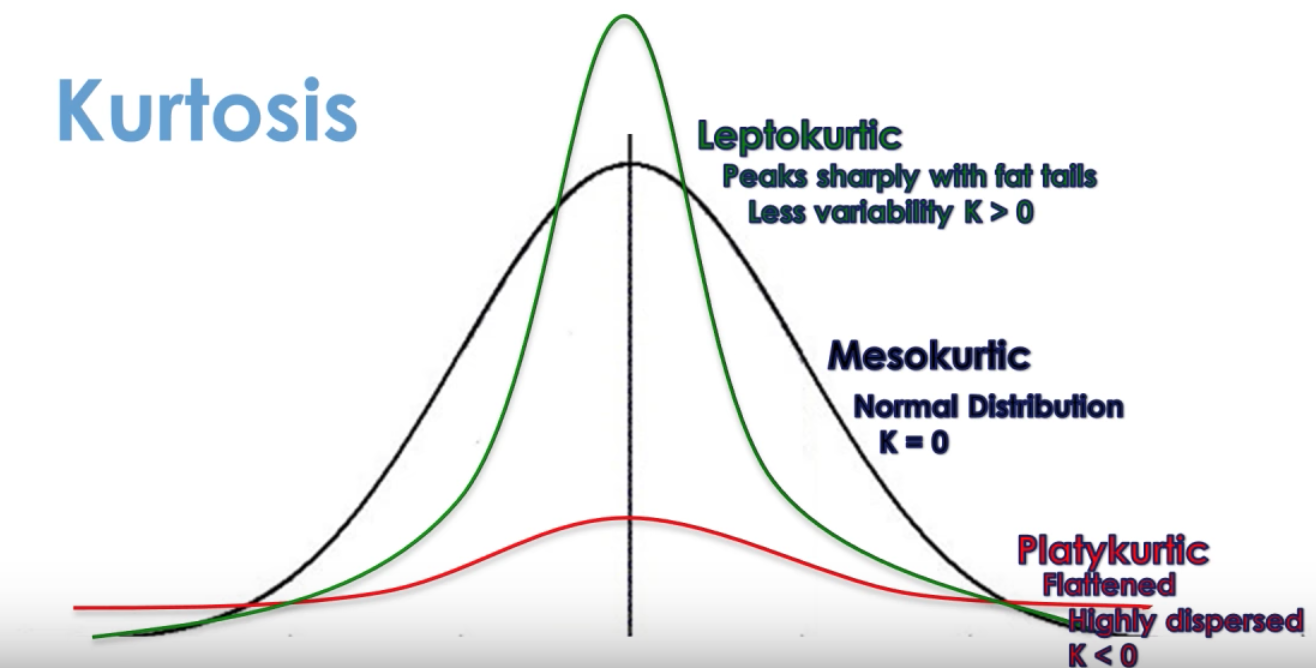

In [42]:
Image(filename='kurtosis.png', width=600) 

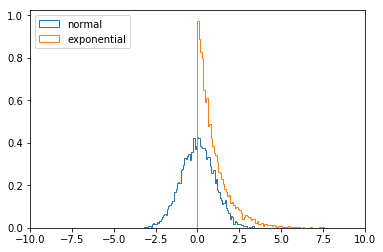

In [43]:
samples_1 = np.random.standard_normal(size=10000)
samples_2 = np.random.standard_exponential(size=10000)

# Make histograms
_ = plt.hist(samples_1, bins = 100, normed=True, histtype='step')
_ = plt.hist(samples_2, bins = 100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('normal', 'exponential'))
plt.xlim(-10, 10)
plt.show()

In [44]:
print(ss.kurtosis(samples_1))
print(ss.kurtosis(samples_2))

-0.01226339246326269
5.345742810448016


### Examples
### Normal distribution


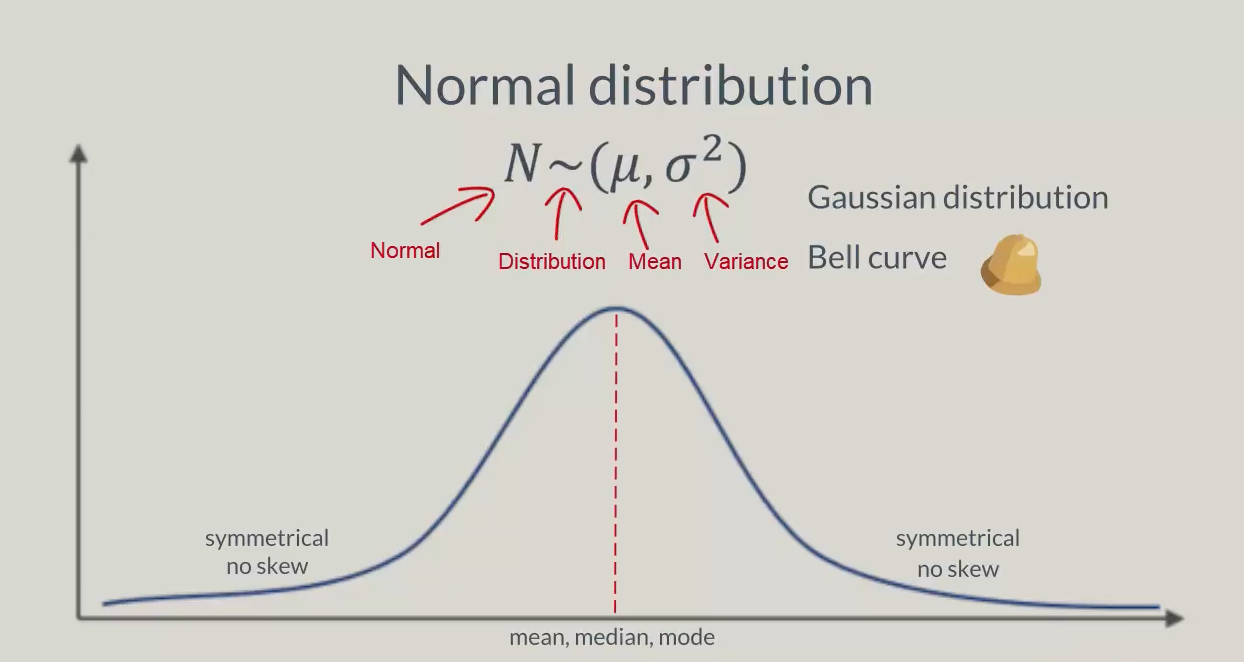

In [45]:
Image(filename='normal_distribution.png', width=600) 

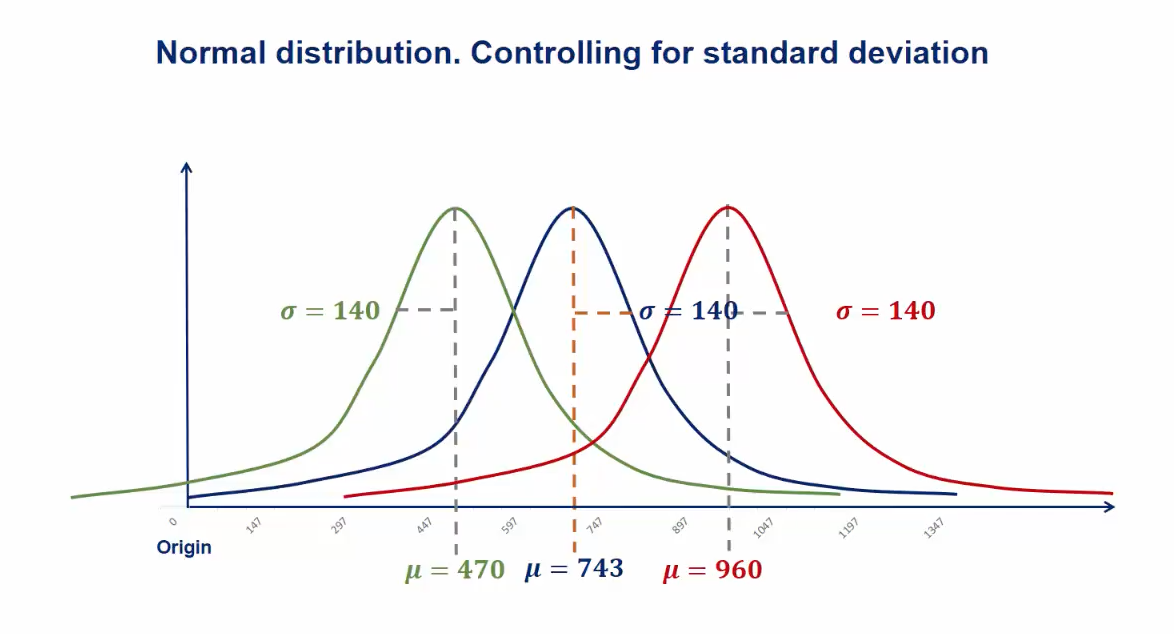

In [46]:
Image(filename='mean.png', width=600)

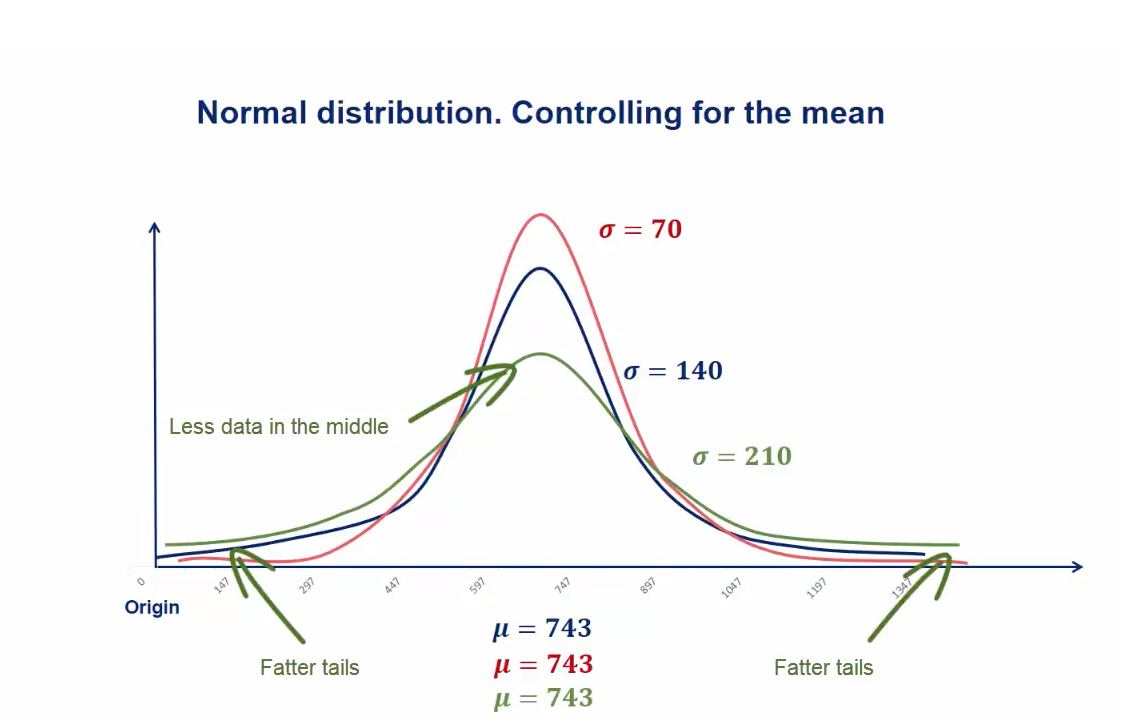

In [47]:
Image(filename='variance.png', width=600)

### *Review Questions*
* Low variation vs high variation



# <center>======================================<center>

<h1>Covariance - Correllation</h1>
<h3>(A correlation is a statistic intended to quantify the strength of the relationship between two variables.)</h3>

# *Covariance*
### Covariance is a measure of the tendency of two variables to vary together.
### Population Covarian Formula: 
$$covaviance (X,Y)= \frac{1}{N}\sum_{j=1}^N(x_j-\mu(X))(y_j-\mu(Y))$$
### Sample Covarian Formula: 
$$covariance(X,Y)= \frac{1}{n-1}\sum_{j=1}^n(x_j-\bar x)(y_j-\bar y)$$

In [48]:
import numpy as np
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
 
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / (len(xs)-1)
    return cov

Cov(data['sepal_length'],data['sepal_width'])
#Cov([100,2000,4000],[0.2,0.4,0])

-0.03926845637583892

In [49]:
z=np.cov(data['sepal_length'],data['sepal_width'])

In [50]:
z

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [51]:
z[0][1]

-0.03926845637583892

### Note: This number can be hard to interpret, for a couple of reasons: 
* Its units are product of the input's units, which can be hard to make sense of, e.g. kilogram-meters. 
* Covarince can be large or small might depend only one variable.

### One solution of these problems are to divide the deviation by std.

# *Correlation*
### Formula 
$$\rho=\frac{\text{covariance}(X,Y)}{\text{standard_deviation}(X)*\text{standard_deviation}(Y)}$$
### This value is called Pearson's correlation after Karl Pearson, an infuenntial early statiscian. 

### Note: The correlation is unitless and always lies between -1 (perfect  anti-correlation) and 1 (perfect correlation).  A number like 0.25 represents a relatively weak positive correlation.  

In [52]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    corr = Cov(xs, ys) / (StD(xs)*StD(ys))
    return corr

Corr(data['sepal_length'],data['sepal_width'])
#Corr([100,2000,4000],[0.2,0.4,0])

-0.10936924995064934

In [53]:
np.corrcoef(data['sepal_length'], data['sepal_width'])

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

### Examples of datasets with a range of correlations.
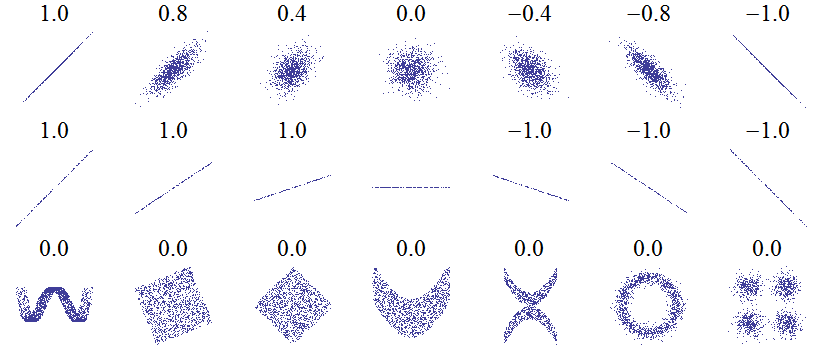

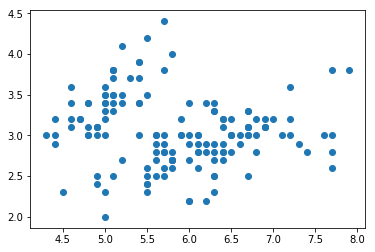

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.show()

/Users/ha.nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


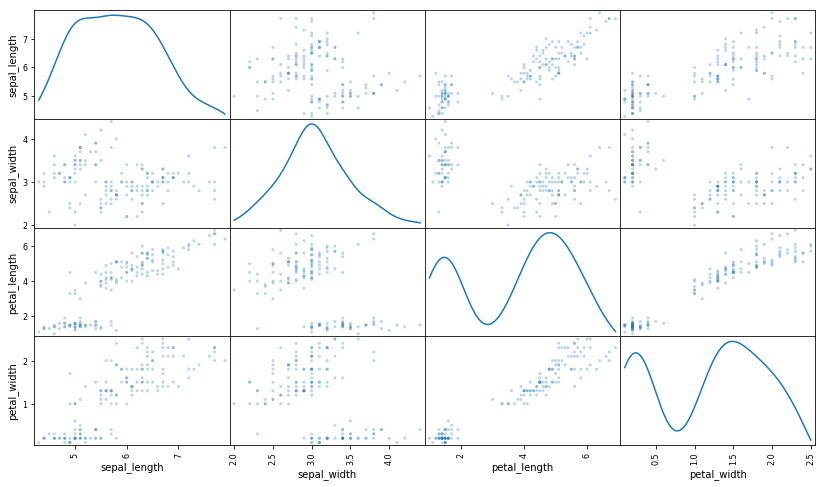

In [55]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

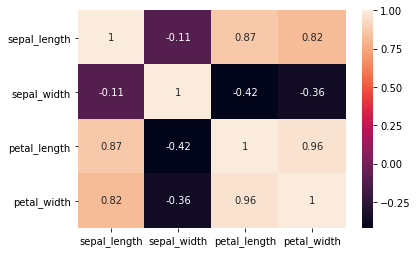

In [56]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

# <center>======================================<cent>

<h1>Outliers</h1>
<h3>(Outliers are value that are far from the central tendency)</h3>


### Outliers might be caused by errors in collecting or processiong the data, or they might be correct but unsusual measeurements. 

### It is always a good ideas to check for outliers, and sometimes it is useful and appropriate to discard them. 

### Variance, standard deviation, covariance, correlation can be very sensitive to outliers. 


# Box plot 
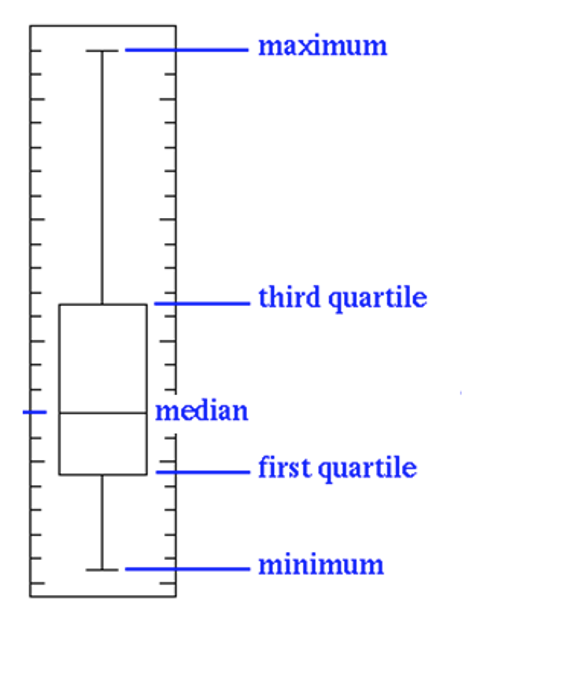

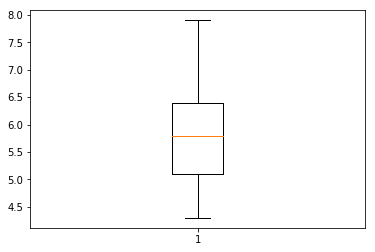

In [57]:
import matplotlib.pyplot as plt
plt.boxplot(data['sepal_length'])
plt.show()

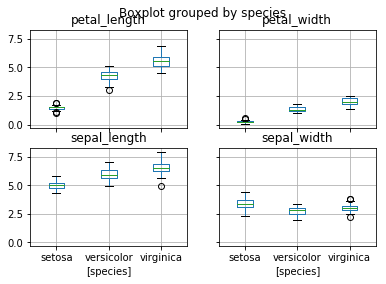

In [58]:
data.boxplot(by='species');

# Find Outliers 

In [59]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in 'sepal_length', 'sepal_width', 'petal_length', 'petal_width':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist()   

Outlier step: 1.950000000000001
Data points considered outliers for the feature 'sepal_length':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Outlier step: 0.75
Data points considered outliers for the feature 'sepal_width':


sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor

Outlier step: 5.249999999999999
Data points considered outliers for the feature 'petal_length':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Outlier step: 2.25
Data points considered outliers for the feature 'petal_width':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

In [60]:
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Number of outliers (inc duplicates):  4
New dataset with removed outliers has 146 samples with 5 features each.


# <center>======================================<center>

<h1>Distribution of a variable</h1>

## *Distribution* - (of a variable) tells us what values the variable takes and how often it takes these values. 
## Exampe of Frequency Distribution: 
### Consider a data set of 26 children of ages 1-6 years. Then the frequency distribution of variable ‘age’ can be tabulated as follows: 
 - ### Frequency Distribution of Age
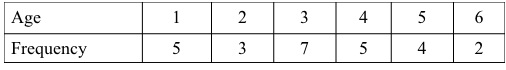

 - ### Bar diagram

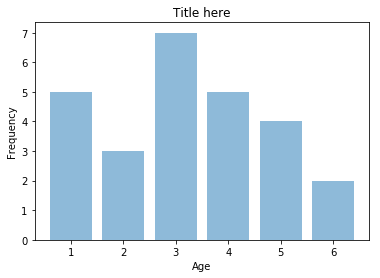

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('1', '2', '3', '4', '5', '6')
y_pos = np.arange(len(objects))
x = [5,3,7,5,4,2]
plt.bar(y_pos, x, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Title here')
 
plt.show()

# Histogram

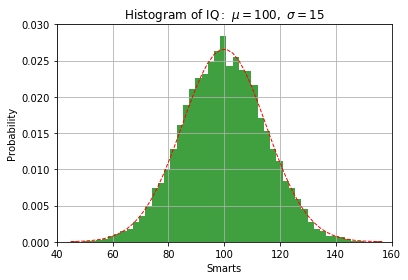

In [62]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

Text(0.5,1,'Distributionb of Sepal Lengths')

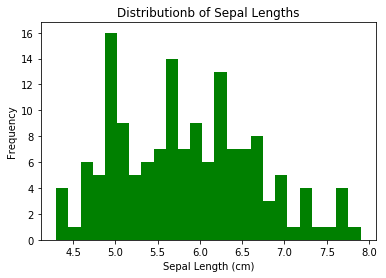

In [63]:
plt.hist(data['sepal_length'],bins=25, facecolor='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distributionb of Sepal Lengths')

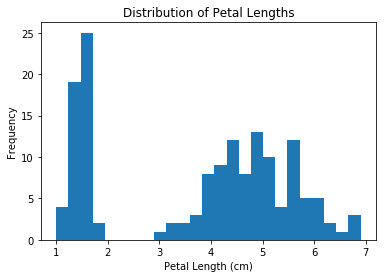

In [64]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

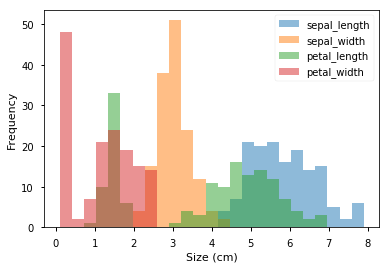

In [65]:
import seaborn as sns
sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef62cf8>,
      dtype=object)

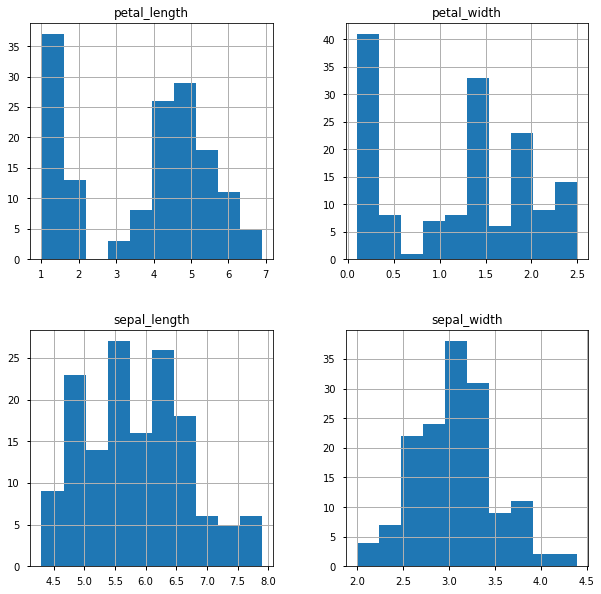

In [66]:
data.hist(
    column=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)

# <center>======================================<cent>

# Hypothesis Testing 


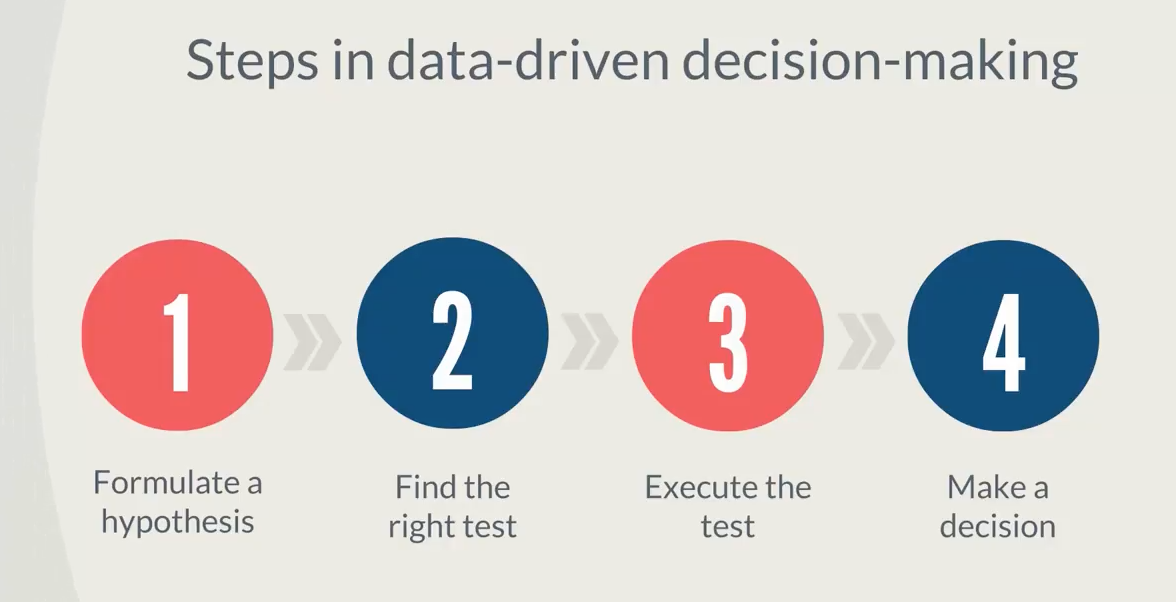

In [67]:
Image(filename='steps_in_data_driven.png', width=600) 

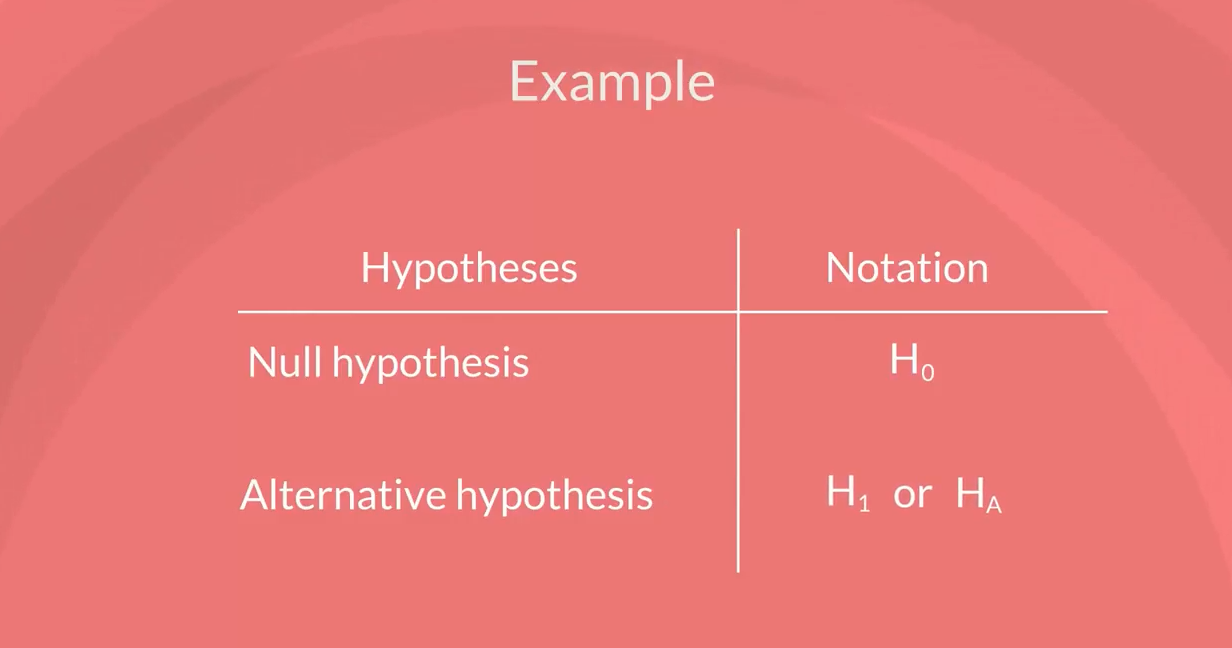

In [68]:
Image(filename='hypothesis_0.png', width=600) 

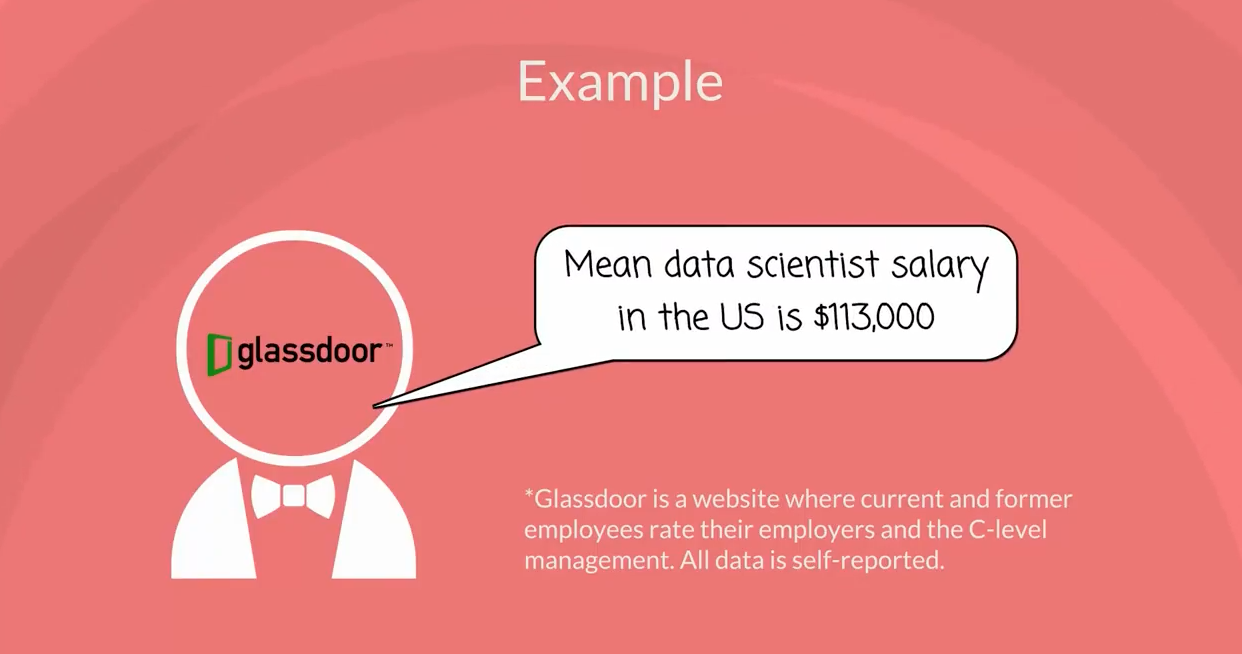

In [69]:
Image(filename='hypothesis_1.png', width=600) 

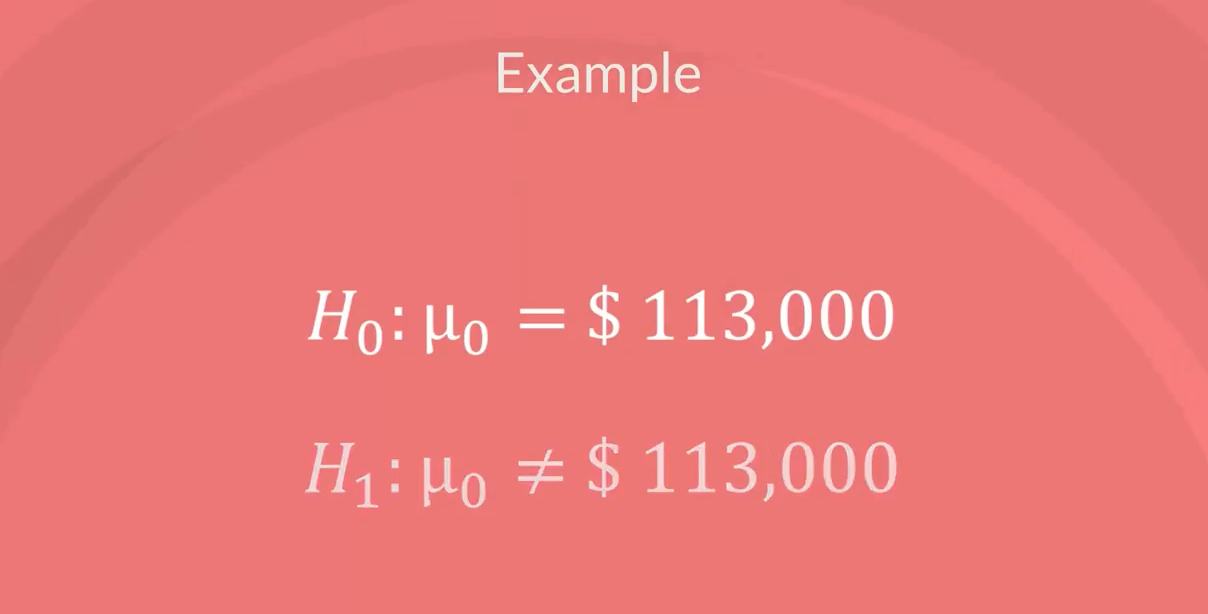

In [70]:
Image(filename='hypothesis_2.png', width=600) 

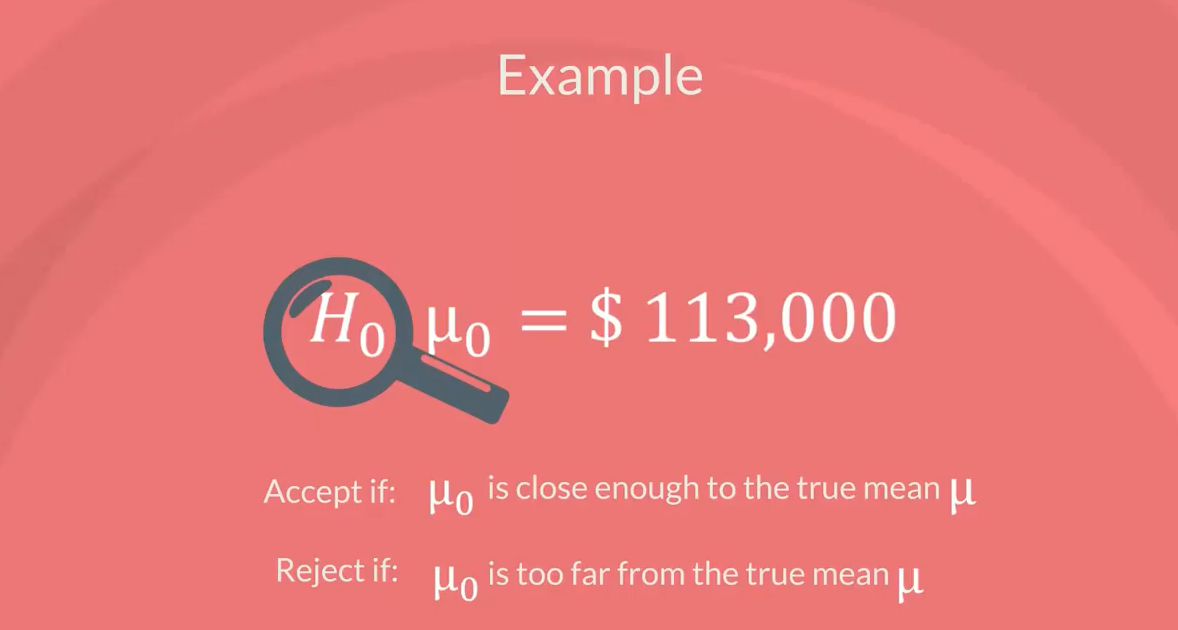

In [71]:
Image(filename='hypothesis_3.png', width=600) 

## Pearson correlation test: 
### Test association between two quantivte variables. The test calculates a Pearson correlation coefficient and the 𝑝-value for testing non-correlation.
### The p-value is the probability of seeing a t-statistic at least that far from 0 if the null hypothesis were true.


In [72]:
import numpy as np
import scipy.stats as ss
c, p = ss.pearsonr(data['sepal_length'],data['sepal_length'])
print("Correlation:", c)
print("p-value for non-correlation:", p)

Correlation: 1.0
p-value for non-correlation: 0.0


In [73]:
# Problem: H: data['sepal_length'],data['sepal_width'] are independent
#H_0: X and Y are dependent 

p=0.1

c, pval = ss.pearsonr(data['sepal_length'],data['sepal_width'])
print("Correlation:", c)
print("p-value for non-correlation:", pval)

if p<pval:
    print("Accept H")
else:
    print("Reject H")

Correlation: -0.10936924995064935
p-value for non-correlation: 0.1827652152713665
Accept H


## One sample t-test (quantitative ~ constant)
### The one-sample 𝑡-test is used to determine whether a sample comes from a population with a specific mean.
### 1. Model the data 
####  Assume $x\sim \mathcal N(\mu,\sigma)$
### 2. Fit: estimate the model paramenters
#### $\bar x$ and $s$ are the estimators of $\mu$ and $\sigma$.
### 3. t-Test. 
$$t=\frac{\bar x-\mu_0}{\frac{s}{\sqrt{n}}}$$


In [74]:
import statistics as sta
import math
z=data['sepal_length']
print(np.mean(z))
t=(np.mean(z)-5.5)*math.sqrt(len(z))/sta.stdev(z)
print(t)

5.843333333333335
5.078045399642548


In [75]:
ss.ttest_1samp(data['sepal_length'],5.8)

Ttest_1sampResult(statistic=0.6409183514112012, pvalue=0.5225602746220779)

# Two sample (Student) t-test: compare two means

## The two-sample 𝑡-test is used to determine if two population means are equal.

## 1. Model of the date: Assume $x\sim \mathcal N(\mu_x,\sigma_x)$ and $y\sim \mathcal N(\mu_y,\sigma_y)$
## 2. Fit: estimate the model parameters: $\bar x,s_x, \bar y, s_y$
## 3. t-test
$$t=\frac{\bar x-\bar y}{s.\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$
where 
$$s=\sqrt{\frac{s_x^2(n_x-1)+s_y^2(n_y-1)}{n_x+n_y-2}}$$

In [76]:
ss.ttest_ind(data['sepal_length'],data['sepal_length'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [77]:
x=data[data['species']=='virginica'].drop(['species'], axis=1)
x.head()

sepal_length  sepal_width  petal_length  petal_width
100           6.3          3.3           6.0          2.5
101           5.8          2.7           5.1          1.9
102           7.1          3.0           5.9          2.1
103           6.3          2.9           5.6          1.8
104           6.5          3.0           5.8          2.2

In [78]:
display(x.describe())

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000

In [79]:
y=data[data['species']=='setosa'].drop(['species'], axis=1)
y.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [80]:
display(y.describe())

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

In [81]:
z=data[data['species']=='versicolor'].drop(['species'], axis=1)
z.head()

sepal_length  sepal_width  petal_length  petal_width
50           7.0          3.2           4.7          1.4
51           6.4          3.2           4.5          1.5
52           6.9          3.1           4.9          1.5
53           5.5          2.3           4.0          1.3
54           6.5          2.8           4.6          1.5

In [82]:
display(z.describe())

sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000

In [83]:
ss.ttest_ind(x['sepal_length'],x['sepal_length'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [84]:
ss.ttest_ind(x['sepal_length'],y['sepal_length'])

Ttest_indResult(statistic=15.386195820079404, pvalue=6.892546060674059e-28)

In [85]:
ss.ttest_ind(x['sepal_length'],z['sepal_length'])

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

# ANOVA

### Analysis of Variance (ANOVA) is a statistical method used to test differences between two or more means. It may seem odd that the technique is called "Analysis of Variance" rather than "Analysis of Means." As you will see, the name is appropriate because inferences about means are made by analyzing variance.

### The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

### F-Distribution. A continuous statistical distribution which arises in the testing of whether two observed samples have the same variance

In [86]:
ss.f_oneway(x['sepal_length'],y['sepal_length'],z['sepal_length'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [87]:
from sklearn.model_selection import train_test_split
A, B = train_test_split(data, test_size=0.5)

In [88]:
import scipy.stats as ss
ss.ttest_ind(A['sepal_length'], B['sepal_length'])

Ttest_indResult(statistic=-0.34408739297421015, pvalue=0.7312689544814146)

In [89]:
C, D= train_test_split(A, test_size=0.5)

In [90]:
ss.f_oneway(B['sepal_length'], C['sepal_length'], D['sepal_length'])

F_onewayResult(statistic=0.9030449557221948, pvalue=0.40757006268348084)